### Imports

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
from pathlib import Path
import tqdm

import gvpy as gv
import sbemoored as sbe

%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [5]:
import bltproc as bp

bp.thermistors.test()

hello world!


In [6]:
pd.set_option("display.max_colwidth", None)

# BLT2 SBE56 Processing

This is for MAVS3/MAVS4 thermistors aka BLT2. We are using CTD calibration data from before the deployment (which were also used for calibrating BLT1 SBE56 thermistors).

In [7]:
B = bp.thermistors.blt2_sbe56_proc()

In [8]:
B.update_proc_info()

In [9]:
B.proc_info.head()

,Notes,utc,inst,cal1,cal2,ctd_cal,Pre-Deployment Notes,processed,raw_data_exists,figure_exists,comment
SN,,,,,,,,,,,
376,NaN,2022-08-09 10:23:10+00:00,2022-08-09 10:23:28+00:00,2021-10-16 17:04:00+00:00,2022-08-09 09:17:00+00:00,2021-10-13 16:00:00+00:00,NaN,True,True,True,ok
392,NaN,2022-08-09 08:28:00+00:00,2022-08-09 08:28:28+00:00,2021-10-16 17:04:00+00:00,2022-08-09 07:10:00+00:00,2021-10-13 16:00:00+00:00,"62 events, Possible High Current Instrument Deploy in less essential location on mooring",True,True,True,ok
393,NaN,2022-08-09 09:24:20+00:00,2022-08-09 09:24:46+00:00,2021-10-16 17:04:00+00:00,2022-08-09 09:17:00+00:00,2021-10-13 16:00:00+00:00,NaN,True,True,True,ok
395,NaN,2022-08-09 15:06:00+00:00,2022-08-09 15:06:36+00:00,2021-10-16 17:04:00+00:00,2022-08-09 15:00:00+00:00,2021-10-13 16:00:00+00:00,NaN,True,True,True,ok
413,NaN,2022-08-09 15:12:00+00:00,2022-08-09 15:12:22+00:00,2021-10-16 17:04:00+00:00,2022-08-09 15:00:00+00:00,2021-10-13 16:00:00+00:00,"62 events, Possible High Current Instrument Deploy in less essential location on mooring",True,True,True,ok


In [10]:
B.proc_next()

all files processed


PROBLEMS:
- 418: time offset appears to be wrong. The clock calibration time appear to be okay as it matches for sensors 916, 6417 that were in the same warm water dip batch. I am guessing that the wrong time was noted when downloading data. I adjusted the logger time in `blt2_sbe56_cal_info.csv` by adding 25 seconds to match the clock cal. The newly processed data then match the clock cal. I added a comment to the spreadsheet.

In [13]:
B.add_comment(
    418,
    "Adding 25s to Logger Time to match clock cal. Original logger time was 14:01:25.",
)
B.proc_info.loc[418].comment

'Adding 25s to Logger Time to match clock cal. Original logger time was 14:01:25.'

In [14]:
B.proc_info.loc[418].comment

'Adding 25s to Logger Time to match clock cal. Original logger time was 14:01:25.'

Now we are done with the basic processing.

Load all time series

In [11]:
B.load_all_nc()

Loop over all thermistors and find gaps.
We want to know
- if a thermistor has gaps at all
- if and when the first long gap occurs
- how many shorter gaps (<1h) occur before the first long gap

In [12]:
B.locate_gaps()

date of first long gap:
915 : 2022-06-29
916 : 2022-07-23
6443 : no long gap
number of short gaps:
915 : 1
916 : 1
6443 : 1


In [17]:
B.comment_short_gaps()

In [18]:
B.comment_long_gap_termination()

Make a note of the thermistors that do not have the warm water dip at the end because they were not measuring anymore. Most (actually for this deployment all?!) of them still had the clock running so should be fine.

In [19]:
B.comment_no_time_verification_at_end()

In [20]:
B.comment_terminates_early()

Remove nan's in Notes

In [21]:
B.comment_remove_nan_notes()

Show `proc_info` for all SNs that had any issues.

In [22]:
B.show_instrument_issues()

,Notes,ctd_cal,Pre-Deployment Notes,processed,raw_data_exists,figure_exists,comment
SN,,,,,,,
418,,2021-10-13 16:00:00+00:00,NaN,True,True,True,Adding 25s to Logger Time to match clock cal. Original logger time was 14:01:25.
915,10 events,2021-10-13 16:00:00+00:00,"62 events, Possible High Current Instrument Deploy in less essential location on mooring",True,True,True,has 1 short gap (<1h) :: terminates 2022-06-29
916,48 events,2021-10-13 16:00:00+00:00,"30 events, Possible High Current Instrument Deploy in less essential location on mooring",True,True,True,has 1 short gap (<1h) :: terminates 2022-07-23
6443,,2021-10-13 16:00:00+00:00,"62 events, Possible High Current Instrument Deploy in less essential location on mooring",True,True,True,has 1 short gap (<1h)


In [23]:
B.comments_to_latex_table()

---

In [24]:
B.thermistor_info_path

PosixPath('/Users/gunnar/Projects/blt/moorings/thermistors')

In [13]:
B.load_mooring_sensor_info()

In [16]:
B.mavs3

,Type,height,depth
SN,,,
477,SBE56,180.8,1253.2
6415,SBE56,192.8,1241.2
6414,SBE56,212.8,1221.2
416,SBE56,224.8,1209.2
6436,SBE56,236.8,1197.2
6429,SBE56,248.8,1185.2
6444,SBE56,260.8,1173.2
6431,SBE56,272.8,1161.2
6428,SBE56,289.9,1144.1


## cut and cal

In [17]:
B.load_ctd_cal()
B.load_mooring_sensor_info()

In [28]:
sbe37_mavs3 = xr.open_dataset(
    "/Users/gunnar/Projects/blt/data/BLT/Moorings/BLT1/MAVS3/SBE37/proc/SN12711/sbe37sm-rs232_03712711_2022_08_05.nc"
)

Find deployment and recovery times.

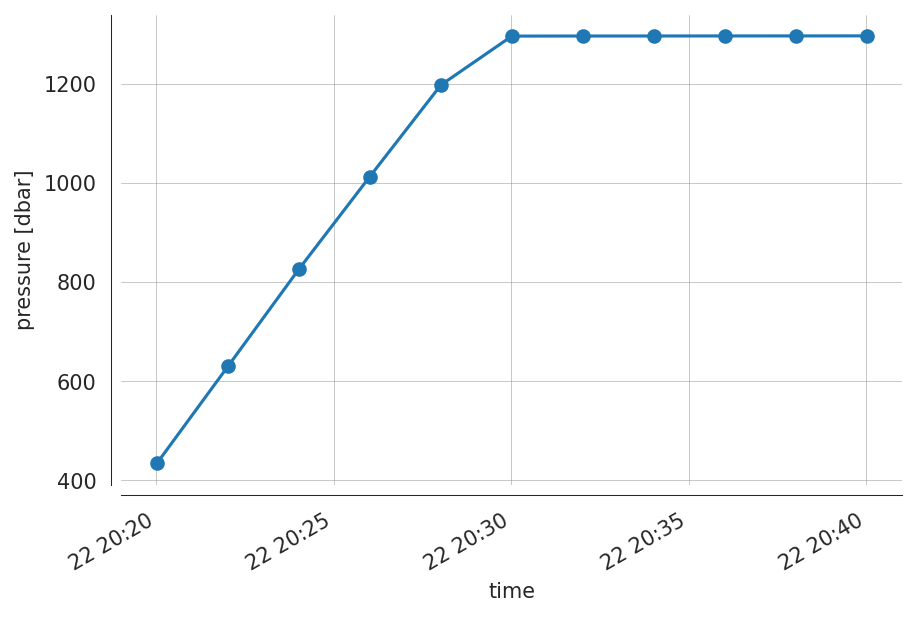

In [29]:
fig, ax = gv.plot.quickfig(grid=True)
sbe37_mavs3.p.sel(time=slice("2021-10-22 20:20", "2021-10-22 20:40")).plot(marker="o")

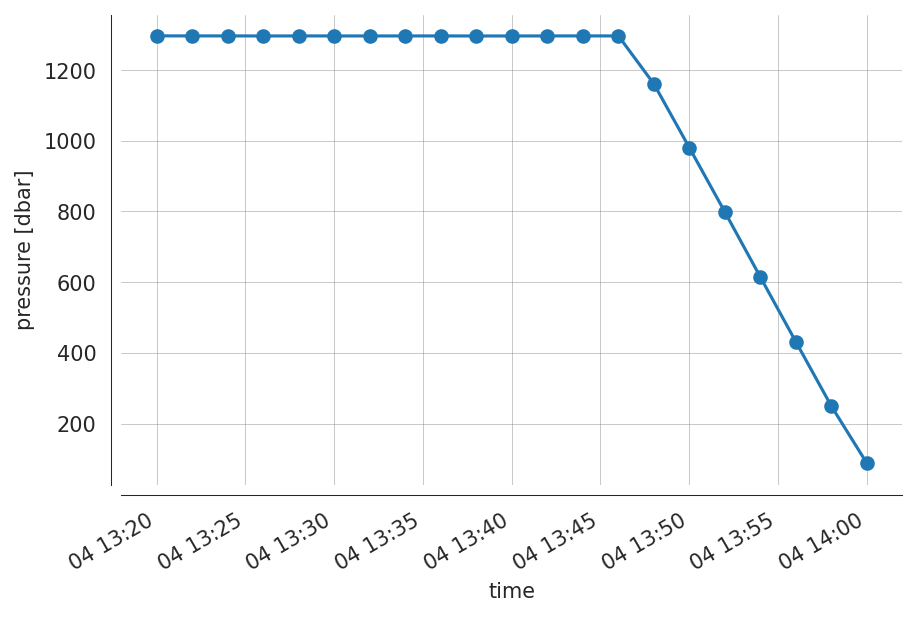

In [30]:
fig, ax = gv.plot.quickfig(grid=True)
sbe37_mavs3.p.sel(time=slice("2022-08-04 13:20", "2022-08-04 14:00")).plot(marker="o")

In [31]:
sbe37_mavs4 = xr.open_dataset(
    "/Users/gunnar/Projects/blt/data/BLT/Moorings/BLT1/MAVS4/SBE37/proc/SN12710/sbe37sm-rs232_03712710_2009_08_25.nc"
)

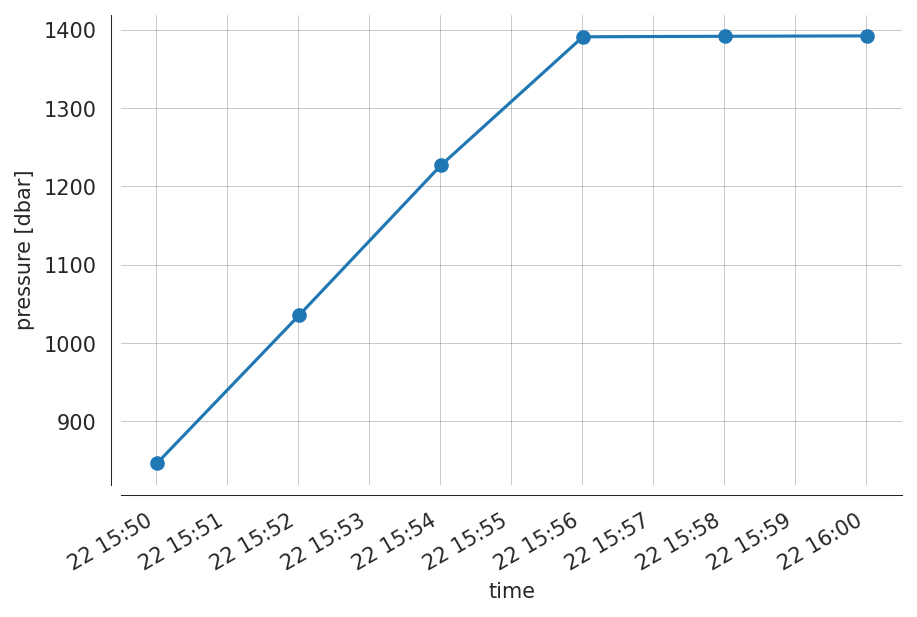

In [32]:
fig, ax = gv.plot.quickfig(grid=True)
sbe37_mavs4.p.sel(time=slice("2021-10-22 15:50", "2021-10-22 16:00")).plot(marker="o")

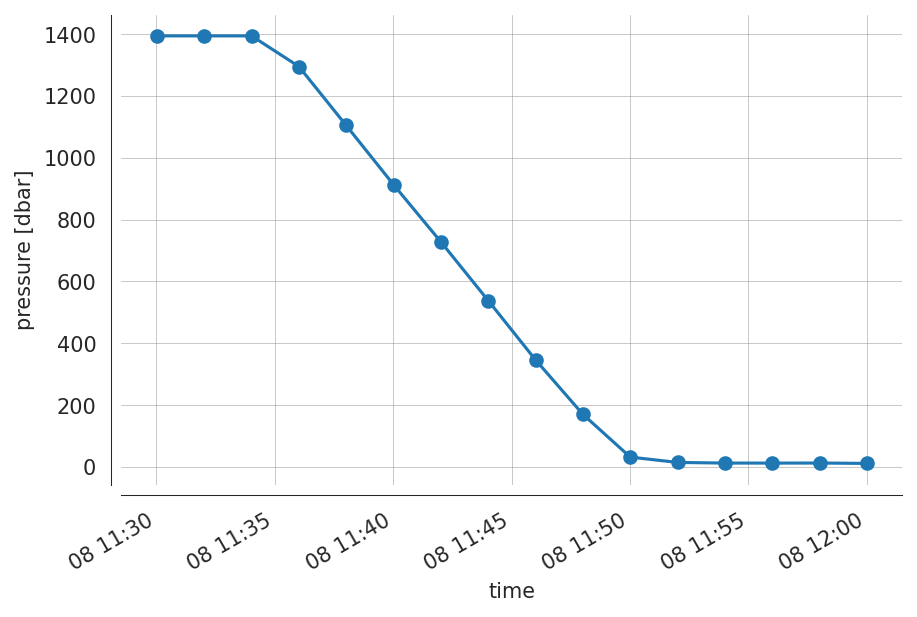

In [33]:
fig, ax = gv.plot.quickfig(grid=True)
sbe37_mavs4.p.sel(time=slice("2022-08-08 11:30", "2022-08-08 12:00")).plot(marker="o")

In [36]:
if False:
    B.generate_all_level1()

## plot level 1 time series

---

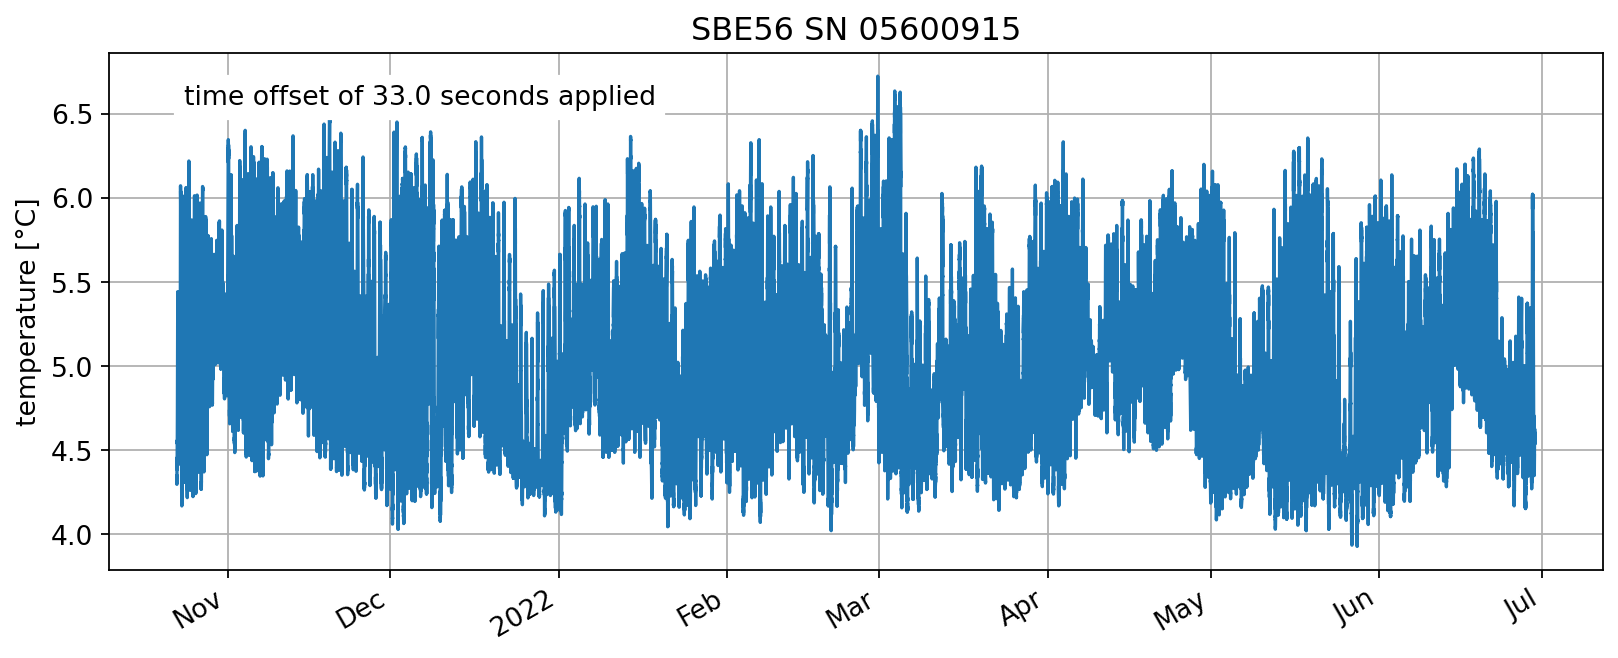

In [37]:
th = B.plot_level1(915)

Plot level 1 data and save all figures to

In [38]:
print(B.figure_out_level1)

/Users/gunnar/Projects/blt/data/BLT/Moorings/BLT1/MAVS/SBE56_2/fig_L1


In [39]:
if False:
    B.plot_all_level1()

  0%|          | 0/51 [00:00<?, ?it/s]

What was the sampling frequency on all of these? 8s.

  0%|          | 0/51 [00:00<?, ?it/s]

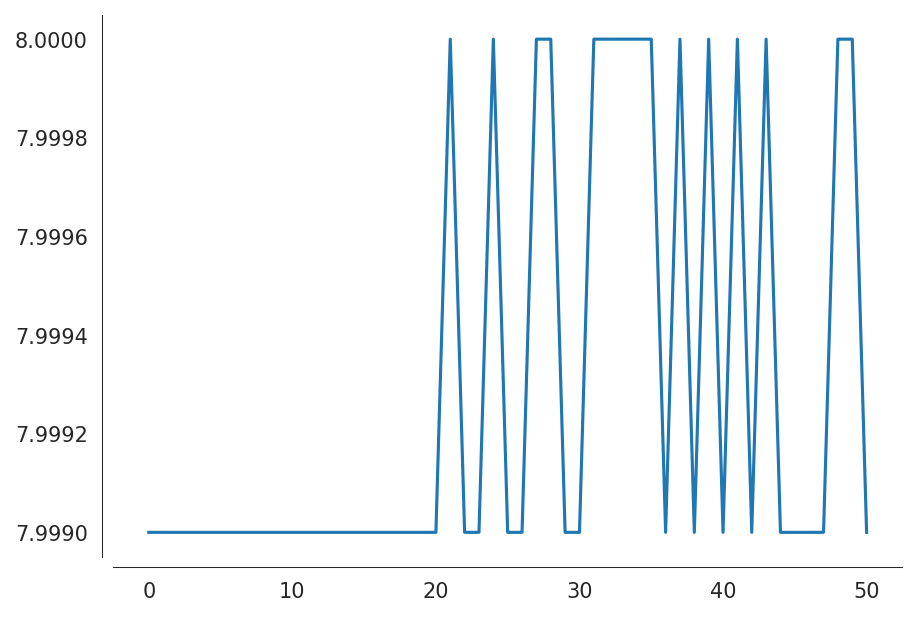

In [40]:
sn = np.array([ti.attrs["sn"] for ti in B.allnc])

sp = []
sp_range = []

for sni in tqdm.notebook.tqdm(sn):
    th = B.load_level1(sni)
    sp.append(th.gv.sampling_period)
    dt = th.time.diff(dim="time")
    sp_range.append(dt.max() - dt.min())

sp = np.array(sp)

fig, ax = gv.plot.quickfig()
ax.plot(sp)

No jumps in sampling frequency detected:

In [41]:
sp_range_ns = np.array([si.astype(float).data.item() for si in sp_range])

In [42]:
sp_range_ns

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.])